![logo-gt.png](attachment:logo-gt.png)

<div class="alert alert-block alert-info">
    <h1>BIOS 4150/BIOL 6150</h1>
    <h3>Instructor: Dr. King Jordan</h3>
    <p>TAs: Shivam Sharma (shivamsharma13@gatech.edu) & Vishva Natarajan (vishvanata@gatech.edu)</p>
</div>

<div class="alert alert-block alert-warning">
    <h2>Project 3 (Variant Calling) starter notebook</h2>
    <h3>Deadline: 11:59PM, November 6th, 2023</h3>
</div>

<div class="alert alert-block alert-danger">
    <h2>Alert!</h2>
    <p>Do not delete any comments or information boxes the starter notebook comes with</p>
</div>

---

# **1. Getting ready for variant calling**
### *Total Questions: 6*
### *Total Points: 5 + 5 + 30 + 45 + 20 + 45 = 150*


---

<div class="alert alert-block alert-warning">
    <h3>1.1 Check your SAM file</h3>
    <p>We will start from where we left off in Project #2. We want to make sure that we are using the corrent SAM file.</p>
</div>

In [2]:
#Check you SAM file here.
!ls -lh ~/scratch/project/project2/SRR070501_Minimap.sam

-rw-r--r-- 1 akrishna311 gtperson 15G Oct 27 19:06 /home/hice1/akrishna311/scratch/project/project2/SRR070501_Minimap.sam


In [3]:
# create directory for this project and copy required SAM and BAM files into the directory
!mkdir -p ~/scratch/project/project3
!cp ~/scratch/project/project2/*am ~/scratch/project/project3

In [5]:
# Check the files in the directory
!ls -lh ~/scratch/project/project3

total 17G
-rw-r--r-- 1 akrishna311 gtperson 2.8G Nov  1 16:42 SRR070501_Minimap.bam
-rw-r--r-- 1 akrishna311 gtperson  15G Nov  1 16:42 SRR070501_Minimap.sam


<div class="alert alert-block alert-warning">
    <h3>1.2 Check your SAM file</h3>
    <p>Show that your SAM file is sorted</p>
</div>

In [7]:
#Show that your SAM file is sorted by genomic coordinates.
!samtools view -H ~/scratch/project/project3/SRR070501_Minimap.sam | head 

@HD	VN:1.6	SO:coordinate
@SQ	SN:NC_000001.11	LN:248956422
@SQ	SN:NT_187361.1	LN:175055
@SQ	SN:NT_187362.1	LN:32032
@SQ	SN:NT_187363.1	LN:127682
@SQ	SN:NT_187364.1	LN:66860
@SQ	SN:NT_187365.1	LN:40176
@SQ	SN:NT_187366.1	LN:42210
@SQ	SN:NT_187367.1	LN:176043
@SQ	SN:NT_187368.1	LN:40745


###### <code>SO:coordinate</code> - this means the SAM file is sorted by genomic co-ordinates

In [8]:
#This is a repeat from last project, but we want to check the sorted file again.
!samtools view -H ~/scratch/project/project3/SRR070501_Minimap.sam

# -H: shows only headers

@HD	VN:1.6	SO:coordinate
@SQ	SN:NC_000001.11	LN:248956422
@SQ	SN:NT_187361.1	LN:175055
@SQ	SN:NT_187362.1	LN:32032
@SQ	SN:NT_187363.1	LN:127682
@SQ	SN:NT_187364.1	LN:66860
@SQ	SN:NT_187365.1	LN:40176
@SQ	SN:NT_187366.1	LN:42210
@SQ	SN:NT_187367.1	LN:176043
@SQ	SN:NT_187368.1	LN:40745
@SQ	SN:NT_187369.1	LN:41717
@SQ	SN:NC_000002.12	LN:242193529
@SQ	SN:NT_187370.1	LN:161471
@SQ	SN:NT_187371.1	LN:153799
@SQ	SN:NC_000003.12	LN:198295559
@SQ	SN:NT_167215.1	LN:155397
@SQ	SN:NC_000004.12	LN:190214555
@SQ	SN:NT_113793.3	LN:209709
@SQ	SN:NC_000005.10	LN:181538259
@SQ	SN:NT_113948.1	LN:92689
@SQ	SN:NC_000006.12	LN:170805979
@SQ	SN:NC_000007.14	LN:159345973
@SQ	SN:NC_000008.11	LN:145138636
@SQ	SN:NC_000009.12	LN:138394717
@SQ	SN:NT_187372.1	LN:40062
@SQ	SN:NT_187373.1	LN:38054
@SQ	SN:NT_187374.1	LN:176845
@SQ	SN:NT_187375.1	LN:39050
@SQ	SN:NC_000010.11	LN:133797422
@SQ	SN:NC_000011.10	LN:135086622
@SQ	SN:NC_000012.12	LN:133275309
@SQ	SN:NC_000013.11	LN:114364328
@SQ	SN:NC_000014.9	LN:107043718
@S

<div class="alert alert-block alert-warning">
    <h3>1.3 The pieleup format</h3>
    <p><b>1.3.1</b> A lot of variant callers use the pielup format for calling variants from SAM file. Explain in 2-3 lines what is the pileup format?</p>
    <p><b>1.3.2</b> Explain the 6 columns of a pielup format file in your own words.</p>
</div>

In [4]:
#Information about the pileup format.

> Pileup format consists of TAB-separated lines. A pileup is essentially a column-wise representation of the aligned reads - at the base level - to the reference. The pileup file summarises all data from the reads at each genomic region that is covered by at least one read. Several columns contain numeric quality values encoded as individual ASCII characters.

In [6]:
#Information about the 6 fields of the pieleup format file.
#Write one sentence for each file.

The six fields of pileup files are -
1. Sequence - Sequence identifier
2. Position - Position in sequence (starting from 1)
3. Reference base - Reference nucleotide at that position
4. Read count - Number of aligned reads covering that position (depth of coverage)
5. Read results - Bases at that position from aligned reads
6. Quality - Phred Quality of those bases, represented in ASCII with -33 offset (OPTIONAL)

<div class="alert alert-block alert-warning">
    <h3>1.4 Create the pileup file</h3>
    <p>Using samtools, create the pileup file for the SAM file of your 1000 genomes individuals</p>
</div>

In [ ]:
#We got an error when creating pileup file using gzipped reference genome. So we are unzipping the reference
!gunzip ~/scratch/project/project2/GCF_000001405.40_GRCh38.p14_genomic.fna.gz

In [11]:
#Your command for pileup here.
# we are making use of reference file in project2's directory 
!samtools mpileup -f ~/scratch/project/project2/GCF_000001405.40_GRCh38.p14_genomic.fna ~/scratch/project/project3/SRR070501_Minimap.bam -o ~/scratch/project/project3/SRR070501.mpileup

[mpileup] 1 samples in 1 input files


In [12]:
#Show the first 10 lines of the Pileup file.
!head -n 10 ~/scratch/project/project3/SRR070501.mpileup

NC_000001.11	10227	c	1	^".	A
NC_000001.11	10228	t	1	.	B
NC_000001.11	10229	a	1	.	>
NC_000001.11	10230	a	1	.	:
NC_000001.11	10231	c	1	A	:
NC_000001.11	10232	c	1	.	:
NC_000001.11	10233	c	1	.	:
NC_000001.11	10234	c	1	.	:
NC_000001.11	10235	t	1	.+1A	:
NC_000001.11	10236	a	0	*	*


In [13]:
#Show the 10,000 - 10,010 lines of the Pileup file.
!sed -n '10000,10010p' ~/scratch/project/project3/SRR070501.mpileup

NC_000001.11	39506	C	1	,	E
NC_000001.11	39507	T	1	,	D
NC_000001.11	39508	G	1	,	E
NC_000001.11	39509	C	1	,	B
NC_000001.11	39510	C	1	,	B
NC_000001.11	39511	A	1	,	B
NC_000001.11	39512	T	1	,	B
NC_000001.11	39513	T	1	,	B
NC_000001.11	39514	C	1	,	B
NC_000001.11	39515	A	1	,	A
NC_000001.11	39516	C	1	,	?


In [15]:
#Show the 200,000 - 200,010 lines of the Pileup file.
!awk 'NR>=200000 && NR<=200010' ~/scratch/project/project3/SRR070501.mpileup

NC_000001.11	989642	C	1	.	B
NC_000001.11	989643	C	1	.	E
NC_000001.11	989644	T	1	.	E
NC_000001.11	989645	T	1	.	B
NC_000001.11	989646	C	1	.	A
NC_000001.11	989647	T	1	.	@
NC_000001.11	989648	G	1	.	7
NC_000001.11	989649	T	1	.	5
NC_000001.11	989650	G	1	.	:
NC_000001.11	989651	T	1	.	/
NC_000001.11	989652	C	1	.	>


In [16]:
#Since the above commands were showing matches for 1 base only, we ran tail command to check if there are any reads which have more matches
!tail ~/scratch/project/project3/SRR070501.mpileup

NC_012920.1	16560	C	50	.$,$.,,.....,.,,.,..,,,.,.,..,,,,,..,.,,,,,,,...,..,	1EEFGCEFEE:@GGCFEFGGGBFCDEEGG:FGEEFGGDGCEGGEGEFGAE
NC_012920.1	16561	A	48	.$,$,$.....,.,,.,..,,,.,.,..,,,,,..,.,,,,,,,...,..,	EEECEEEC:CGEDFEGFGGBFE=EEGDDFFEEEGGDFEEGGEGGEECE
NC_012920.1	16562	T	44	.$.$...,.,,.,..,,,.,.,..,,,,,..,.,,,,,,...,..,	CEFE?ECGGEEEEEGG=DEBEGGD?FGEEBEGF:EFE=FGEGEB
NC_012920.1	16563	C	43	.$..,.,,.,..,,,.,.,..,,,,,..,.,,,,,,,...,..,	DECE8GGEFBBGGG?DEEEEGG?GGE@CGGAGEEFGEGGFGDF
NC_012920.1	16564	A	42	.$.$,$.,,.,..,,,.,.,..,,,,,..,.,,,,,,,...,..,	EBECGBEEFEDGEBFDCEEGBDGFEEBGFDDCEDGEGDFEEE
NC_012920.1	16565	C	39	.$,$,$.,..,,,.,.,..,,,,,..,.,,,,,,,...,..,	CEEEEFEGGB@GEFEEGGFGGGE;FGBGFEEGEFGAGEG
NC_012920.1	16566	G	36	.$,$..,,,.,.,..,,,,,..,.,,,,,,,...,..,	EEFGGGG=ABEEEEE?GGEE7EGBGDFFGEGGGG?G
NC_012920.1	16567	A	34	..,,,.,.,..,,,,,..,.,,,,,,,...,..,	=EFGFBA?B???>?DDDD6BDDDDDDD:DDCD?D
NC_012920.1	16568	T	34	.$.$,$,,.,.,..,,,,,..,$.,,,,,,,...,..,	EEEGG@C=><<<;<BBAB3BBBBBBBBAABAAAB
NC_012920.1	165

<div class="alert alert-block alert-warning">
    <h3>1.5 Look more into the pileup file</h3>
    <p>Show the 100,000th entry in your pileup file and explain (2-4 lines) what information column 5 <b><i>Read Results</i></b> is providing the user</p>
</div>

In [18]:
#Show the 100,000th entry here.
!awk 'NR == 100000 {print; exit}' ~/scratch/project/project3/SRR070501.mpileup

NC_000001.11	620276	a	1	.	G


In [10]:
#Explain the entry here.

1. Sequence - sequence identifier is NC_000001.11 where 11 is the chromosome 11
2. Position - position in sequence is 620276
3. Reference base - reference nucleotide at 620276 position is 'a'
4. Read count - depth of the read is 1
5. Read results - a dot means a match to the reference base on the forward strand
6. Quality - Phred Quality score is G which is equivalent to 71

The 5th column of 100,000th line for our mpileup file is just ".". But there can also be other symbols in the 5th column as follows -

1) . (dot) means a base that matched the reference on the forward strand <br>
2) , (comma) means a base that matched the reference on the reverse strand <br>
3) </> (less-/greater-than sign) denotes a reference skip. This occurs, for example, if a base in the reference genome is intronic and a read maps to two flanking exons. If quality scores are given in a sixth column, they refer to the quality of the read and not the specific base.<br>
4) AGTCN (upper case) denotes a base that did not match the reference on the forward strand<br>
5) agtcn (lower case) denotes a base that did not match the reference on the reverse strand<br>
6) A sequence matching the regular expression \+[0-9]+[ACGTNacgtn]+ denotes an insertion of one or more bases starting from the next position. For example, +2AG means insertion of AG in the forward strand<br>
7) A sequence matching the regular expression \-[0-9]+[ACGTNacgtn]+ denotes a deletion of one or more bases starting from the next position. For example, -2ct means deletion of CT in the reverse strand<br>
8) ^ (caret) marks the start of a read segment and the ASCII of the character following `^' minus 33 gives the mapping quality<br>
9) $ (dollar) marks the end of a read segment<br>
10) * (asterisk) is a placeholder for a deleted base in a multiple basepair deletion that was mentioned in a previous line by the -[0-9]+[ACGTNacgtn]+ notation<br>

<div class="alert alert-block alert-warning">
    <h3>1.6 Plot the read count distribution</h3>
    <p>A graph that shows how many reads are aligning to a specific genomic region could be helpful for determining flags for our variant caller. 
    <p>Plot a graph (thin bars or line) between <b><i>Read Count (y-axis)</i></b> and <b><i>Position (x-axis)</i></b> only for <u>chromosome 20</u>.</p>
    <hr>
    <p>You can use Python for visualization, but will have to filter the pileup file using bash or python.</p>
</div>

In [8]:
#An awk command can help you create a file with just the information for chr20.

!grep "^NC_000020\..*" ~/scratch/project/project3/SRR070501.mpileup | awk '{print $2, $4}'  > ~/scratch/project/project3/chr20_readcount_pos.txt

![chr20.jpg](attachment:chr20.jpg)

In [5]:
!head ~/scratch/project/project3/chr20_readcount_pos.txt

60063 0
60064 0
60065 0
60066 0
60067 0
60068 0
60069 1
60070 1
60071 1
60072 1


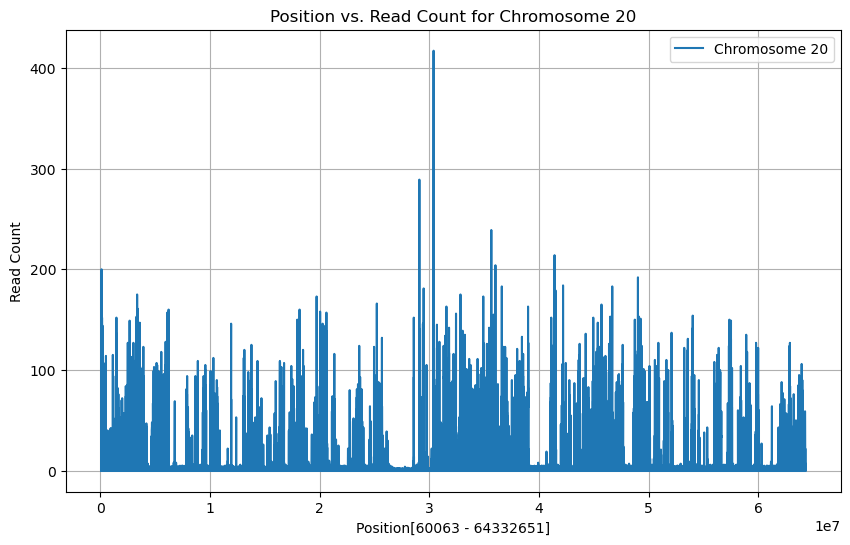

In [4]:
#Plot your graph and show it here (matplotlib/seaborn)
import matplotlib.pyplot as plt

# Read data from the file and filter for chromosome 20
x = []
y = []
with open("/home/hice1/akrishna311/scratch/project/project3/chr20_readcount_pos.txt", "r") as file:
    for line in file:
        fields = line.split()
        x.append(int(fields[0]))
        y.append(int(fields[1]))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Chromosome 20")
plt.title("Position vs. Read Count for Chromosome 20")
plt.xlabel("Position[60063 - 64332651]")
plt.ylabel("Read Count")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# **2. Variant calling**
### *Total Questions: 3*
### *Total Points: 50+30+10+40 = 130*


---

<div class="alert alert-block alert-warning">
    <h3>2.1 Call the variants (SNPs and Short Indels)</h3>
    <p><b>2.1.1</b> Write the command used and justify the flags you have used using one sentence.</p>
    <p><b>2.1.2</b> Informed decision.</p>
</div>

In [20]:
#Use VarScan for calling variants. Look up the appropriate command for this.

In [12]:
#check if varscan is working
!varscan
!varscan pileup2snp --help

VarScan v2.4.6

***NON-COMMERCIAL VERSION***

USAGE: java -jar VarScan.jar [COMMAND] [OPTIONS] 

COMMANDS:
	pileup2snp		Identify SNPs from a pileup file
	pileup2indel		Identify indels a pileup file
	pileup2cns		Call consensus and variants from a pileup file
	mpileup2snp		Identify SNPs from an mpileup file
	mpileup2indel		Identify indels an mpileup file
	mpileup2cns		Call consensus and variants from an mpileup file

	somatic			Call germline/somatic variants from tumor-normal pileups
	mpileup2somatic		Call germline/somatic variants in multi-tumor-normal mpileup (beta feature in v2.4.5)
	copynumber		Determine relative tumor copy number from tumor-normal pileups
	readcounts		Obtain read counts for a list of variants from a pileup file

	filter			Filter SNPs by coverage, frequency, p-value, etc.
	somaticFilter		Filter somatic variants for clusters/indels
	fpfilter		Apply the false-positive filter

	processSomatic		Isolate Germline/LOH/Somatic calls from output
	copyCaller		GC-adjust and pro

In [61]:
#Running VarScan 
!varscan mpileup2snp ~/scratch/project/project3/SRR070501.mpileup --min-coverage 30 --min-reads2 10 --output-vcf > ~/scratch/project/project3/SRR070501.vcf

Only SNPs will be reported
Min coverage:	30
Min reads2:	10
Min var freq:	0.2
Min avg qual:	15
P-value thresh:	0.01
Reading input from /home/hice1/akrishna311/scratch/project/project3/SRR070501.mpileup
631429099 bases in pileup file
18251 variant positions (17262 SNP, 989 indel)
764 were failed by the strand-filter
16516 variant positions reported (16516 SNP, 0 indel)


In [18]:
#Make an informed decision (based on section 1) about the parameters used for calling the variants.
#There is no specific answer to this, but the idea is to look into the flags used, and make sure they make sense.

<code> --min-coverage </code> - SNP caller needs a minimal level of coverage to be reliable. So we went ahead with mean coverage of 30× as this will lead to confident SNP scores and tolerates areas with somewhat lower coverage. <br>
<code> --min-reads2 </code> - it specifies that minimum reads supporting the variant, increasing confidence in the variant call. <br>
<code>--output-vcf </code> - Outputs the content in VCF format

In [62]:
#checking the VCF file
!ls -lh ~/scratch/project/project3/SRR070501.vcf
!head -20 ~/scratch/project/project3/SRR070501.vcf

-rw-r--r-- 1 akrishna311 gtperson 2.7M Nov  3 22:23 /home/hice1/akrishna311/scratch/project/project3/SRR070501.vcf
##fileformat=VCFv4.3
##source=VarScan2
##INFO=<ID=ADP,Number=1,Type=Integer,Description="Average per-sample depth of bases with Phred score >= 15">
##INFO=<ID=WT,Number=1,Type=Integer,Description="Number of samples called reference (wild-type)">
##INFO=<ID=HET,Number=1,Type=Integer,Description="Number of samples called heterozygous-variant">
##INFO=<ID=HOM,Number=1,Type=Integer,Description="Number of samples called homozygous-variant">
##INFO=<ID=NC,Number=1,Type=Integer,Description="Number of samples not called">
##FILTER=<ID=str10,Description="Less than 10% or more than 90% of variant supporting reads on one strand">
##FILTER=<ID=indelError,Description="Likely artifact due to indel reads at this position">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
##FORMAT=<ID=GQ,Number=1,Type=Integer,Description="Genotype Quality">
##FORMAT=<ID=SDP,Number=1,Type=Integ

In [63]:
#Checking the content of VCF file
!cat ~/scratch/project/project3/SRR070501.vcf | grep -v "##" | head

#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	Sample1
NC_000001.11	30315	.	G	C	.	PASS	ADP=100;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:82:100:100:75:25:25%:5.3634E-9:32:35:39:36:20:5
NC_000001.11	30376	.	C	T	.	PASS	ADP=64;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:45:64:64:50:14:21.88%:2.7518E-5:35:36:10:40:4:10
NC_000001.11	30411	.	G	T	.	PASS	ADP=69;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:71:69:69:48:21:30.43%:7.9107E-8:34:34:2:46:3:18
NC_000001.11	200876	.	G	T	.	PASS	ADP=67;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:48:67:67:52:15:22.39%:1.2648E-5:35:35:19:33:4:11
NC_000001.11	200890	.	C	T	.	PASS	ADP=53;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:46:53:53:39:14:26.42%:2.2741E-5:35:34:12:27:4:10
NC_000001.11	450718	.	T	C	.	PASS	ADP=90;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF

<div class="alert alert-block alert-warning">
    <h3>2.2 Select any random variant in your VCF file which lies between the positions 20,800,000 and 30,800,000 on chromosome 16</h3>
    <p><b>Q.</b> What is the average depth of bases for this variant called on chromosome 16</p>
</div>

#### Zipping the file for using it with bcftools

In [64]:
#zip VCF file to create BGZ file
!bgzip -c ~/scratch/project/project3/SRR070501.vcf > ~/scratch/project/project3/SRR070501.vcf.bgz 

In [65]:
#to check if the BGZ file was created successfully
!htsfile ~/scratch/project/project3/SRR070501.vcf.bgz

/home/hice1/akrishna311/scratch/project/project3/SRR070501.vcf.bgz:	VCF version 4.3 BGZF-compressed variant calling data


In [67]:
#checking the content of zipped VCF file
!zcat ~/scratch/project/project3/SRR070501.vcf.bgz | grep -v "##" | head

#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	Sample1
NC_000001.11	30315	.	G	C	.	PASS	ADP=100;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:82:100:100:75:25:25%:5.3634E-9:32:35:39:36:20:5
NC_000001.11	30376	.	C	T	.	PASS	ADP=64;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:45:64:64:50:14:21.88%:2.7518E-5:35:36:10:40:4:10
NC_000001.11	30411	.	G	T	.	PASS	ADP=69;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:71:69:69:48:21:30.43%:7.9107E-8:34:34:2:46:3:18
NC_000001.11	200876	.	G	T	.	PASS	ADP=67;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:48:67:67:52:15:22.39%:1.2648E-5:35:35:19:33:4:11
NC_000001.11	200890	.	C	T	.	PASS	ADP=53;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:46:53:53:39:14:26.42%:2.2741E-5:35:34:12:27:4:10
NC_000001.11	450718	.	T	C	.	PASS	ADP=90;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF

In [68]:
#creating index file for zipped VCF file to give it as input file for bcftools
!tabix -p vcf ~/scratch/project/project3/SRR070501.vcf.bgz

In [69]:
!bcftools view -r NC_000016.10:20800000-30800000 ~/scratch/project/project3/SRR070501.vcf.bgz -o ~/scratch/project/project3/SRR070501_pruned_chr16.vcf

-r: filter using regions, chromosome number and position on the chromosome <br>
-o: output file path

In [70]:
#There could be multiple variants in this range, please select one.
!cat ~/scratch/project/project3/SRR070501_pruned_chr16.vcf 

##fileformat=VCFv4.3
##FILTER=<ID=PASS,Description="All filters passed">
##source=VarScan2
##INFO=<ID=ADP,Number=1,Type=Integer,Description="Average per-sample depth of bases with Phred score >= 15">
##INFO=<ID=WT,Number=1,Type=Integer,Description="Number of samples called reference (wild-type)">
##INFO=<ID=HET,Number=1,Type=Integer,Description="Number of samples called heterozygous-variant">
##INFO=<ID=HOM,Number=1,Type=Integer,Description="Number of samples called homozygous-variant">
##INFO=<ID=NC,Number=1,Type=Integer,Description="Number of samples not called">
##FILTER=<ID=str10,Description="Less than 10% or more than 90% of variant supporting reads on one strand">
##FILTER=<ID=indelError,Description="Likely artifact due to indel reads at this position">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
##FORMAT=<ID=GQ,Number=1,Type=Integer,Description="Genotype Quality">
##FORMAT=<ID=SDP,Number=1,Type=Integer,Description="Raw Read Depth as reported by SAMtools">
##FORM

##### We selected the 4th variant
> NC_000016.10	21039887	.	G	C	.	PASS	ADP=59;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:112:59:59:29:30:50.85%:6.2104E-12:34:33:15:14:16:14

In [21]:
#The information is there in your VCF file.

###### The average depth of bases for this variant called on chromosome 16 is 50. We referred to 'AD' value (Depth of variant-supporting bases (reads2)) in the 'info' part of the above variant

<div class="alert alert-block alert-warning">
    <h3>2.3 How many indels do you have in your VCF file?</p>
</div>

In [1]:
#Same as above, there are multiple ways of doing this.
!varscan mpileup2indel ~/scratch/project/project3/SRR070501.mpileup --min-coverage 30 --min-reads2 10 --output-vcf > ~/scratch/project/project3/SRR070501_indels.vcf

#!bcftools view -v indels --include INFO/INDEL ~/scratch/project/project3/SRR070501.vcf.bgz -o ~/scratch/project/project3/SRR070501_indels.vcf

Only indels will be reported
Min coverage:	30
Min reads2:	10
Min var freq:	0.2
Min avg qual:	15
P-value thresh:	0.01
Reading input from /home/hice1/akrishna311/scratch/project/project3/SRR070501.mpileup
631429099 bases in pileup file
18251 variant positions (17262 SNP, 989 indel)
764 were failed by the strand-filter
971 variant positions reported (0 SNP, 971 indel)


In [2]:
#Write your command and show the number of indels.
!cat ~/scratch/project/project3/SRR070501_indels.vcf | grep -v "##" | head

#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	Sample1
NC_000001.11	6192905	.	CCA	C	.	PASS	ADP=37;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:52:37:37:22:15:40.54%:5.1339E-6:33:29:14:8:10:5
NC_000001.11	7801093	.	C	CT	.	PASS	ADP=43;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:206:43:43:3:40:93.02%:2.287E-21:35:35:3:0:35:5
NC_000001.11	7847745	.	C	CT	.	PASS	ADP=66;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:91:66:66:40:26:39.39%:6.8388E-10:35:36:24:16:10:16
NC_000001.11	9244919	.	CCCCAGGCA	C	.	PASS	ADP=39;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:48:39:39:25:14:35.9%:1.4735E-5:35:21:13:12:6:8
NC_000001.11	13779899	.	A	ACTC	.	PASS	ADP=61;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:220:62:61:13:49:79.03%:8.3246E-23:34:33:5:8:28:21
NC_000001.11	16027938	.	A	AT	.	PASS	ADP=35;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FRE

In [4]:
#number of indels
!cat ~/scratch/project/project3/SRR070501_indels.vcf | grep -v "[##|#]" | wc -l

971


<div class="alert alert-block alert-warning">
    <h3>2.4 Select any random variant in your VCF file which lies between the position 203,000,000 and 230,000,000 on chromosome 2.</h3>
    <p><b>2.4.1</b> What is the variation observed for your 1000 genome individual at this position? Is it 0/0 1/1/ 0/1 or 1/0? How many copies of reference alleles does your individual carry at this position?</p>
    <p><b>2.4.2</b> How many read bases (forward and reverse) from your pileup file (as selected by VarScan) supported the alternative allele and how many variants supported the reference allele at this position?</p>
</div>

In [6]:
#view the indels VCF file
!head -30 ~/scratch/project/project3/SRR070501_indels.vcf

##fileformat=VCFv4.3
##source=VarScan2
##INFO=<ID=ADP,Number=1,Type=Integer,Description="Average per-sample depth of bases with Phred score >= 15">
##INFO=<ID=WT,Number=1,Type=Integer,Description="Number of samples called reference (wild-type)">
##INFO=<ID=HET,Number=1,Type=Integer,Description="Number of samples called heterozygous-variant">
##INFO=<ID=HOM,Number=1,Type=Integer,Description="Number of samples called homozygous-variant">
##INFO=<ID=NC,Number=1,Type=Integer,Description="Number of samples not called">
##FILTER=<ID=str10,Description="Less than 10% or more than 90% of variant supporting reads on one strand">
##FILTER=<ID=indelError,Description="Likely artifact due to indel reads at this position">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
##FORMAT=<ID=GQ,Number=1,Type=Integer,Description="Genotype Quality">
##FORMAT=<ID=SDP,Number=1,Type=Integer,Description="Raw Read Depth as reported by SAMtools">
##FORMAT=<ID=DP,Number=1,Type=Integer,Description="Quality

In [25]:
#Select the variant.

###### We selected the 5th variant
>NC_000001.11	13779899	.	A	ACTC	.	PASS	ADP=61;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:220:62:61:13:49:79.03%:8.3246E-23:34:33:5:8:28:21

In [26]:
#Variation observed and number of copies for reference allele.

<code> Ref allele </code> - A <br>
<code> Alt allele </code> - ACTC <br>
<code> variation observed </code> - 1/1 - it is alternate homozygous <br>
<code> number of copies of ref allele </code> - 0 <br>

In [27]:
#Number of reads supporting the ref & alt allele.

<code> read depth of ref allele </code> - 5+8 = 13(RDF+RDR) <br>
<code> read depth of alt allele </code> - 28+21 = 49 (ADF+ADR) <br>

# **3. Filtering**
### *Total Questions: 1*
### *Total Points: 20 = 20*


---

<div class="alert alert-block alert-warning">
    <h3>3.1 Extract variants that have average per sample depth of > 50. </h3>
    <p>Show your command and number of variants before and after</p>
</div>

In [7]:
!varscan filter ~/scratch/project/project3/SRR070501.vcf --min-reads2 51 --output-file ~/scratch/project/project3/SRR070501_filtered50.vcf

Min coverage:	10
Min reads2:	51
Min strands2:	1
Min var freq:	0.2
Min avg qual:	15
P-value thresh:	0.1
Reading input from /home/hice1/akrishna311/scratch/project/project3/SRR070501.vcf
16516 entries in input stream
0 had no genotype
0 were called wild-type
0 failed coverage
14283 failed reads2
3 failed strands
0 failed quality
0 failed variant frequency < 0.2
0 failed P-value > 0.1
0 were removed near indels
2230 passed filters


In [12]:
!cat ~/scratch/project/project3/SRR070501.vcf | grep -v "#" | wc -l
!cat ~/scratch/project/project3/SRR070501_filtered50.vcf | grep -v "#" | wc -l

16516
2230


1. Number of variants before filtering - 16516
2. Number of variants after filtering - 2230